## **IMPORTAÇÃO DAS BIBLIOTECAS**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #apenas para a validação cruzada

## **DEFINIÇÃO DA CLASSE DE FUNÇÕES (ROTINAS) DO ALGORITMO**

Nessa seção são definidos:


1.   a inicialização dos pesos sinápicos e bias;
2.   as funções de ativação e suas derivadas;
3.   o fluxo direto de propagação (para frente);
4.   o fluxo de retropropagação (para trás);
5.   a validação e critério de parada;
6.   o treinamento da rede;
7.   a atualização dos pesos sinápicos;
8.   a métrica de avaliação;
9.   a função de visualização dos pesos.



In [ ]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation
        self.weights1 = np.random.randn(self.input_size, self.hidden_size)
        self.weights2 = np.random.randn(self.hidden_size, self.output_size)

    def activation_func(self, x):
        if self.activation == 'sigmoid':
            return 1 / (1 + np.exp(-x))
        elif self.activation == 'relu':
            return np.maximum(0, x)
        elif self.activation == 'tanh':
            return np.tanh(x)
        elif self.activation == 'linear':
            return x

    def activation_func_deriv(self, x):
        if self.activation == 'sigmoid':
            return x * (1 - x)
        elif self.activation == 'relu':
            return np.where(x > 0, 1, 0)
        elif self.activation == 'tanh':
            return 1 - x**2
        elif self.activation == 'linear':
            return np.ones_like(x)

    def forward_pass(self, X):
        hidden_input = np.dot(X, self.weights1)
        hidden_output = self.activation_func(hidden_input)
        output_input = np.dot(hidden_output, self.weights2)
        output_output = self.activation_func(output_input)
        return hidden_output, output_output

    def backward_pass(self, X, y, hidden_output, output_output, learning_rate):
        output_error = y - output_output
        output_delta = output_error * self.activation_func_deriv(output_output)

        hidden_error = output_delta.dot(self.weights2.T)
        hidden_delta = hidden_error * self.activation_func_deriv(hidden_output)

        self.weights2 += learning_rate * hidden_output.T.dot(output_delta)
        self.weights1 += learning_rate * X.T.dot(hidden_delta)

    def train(self, X, y, epochs, learning_rate, early_stopping=False,
              patience=5, validation_data=None):
        mse_train = []
        mse_val = []

        X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2,
                                                          random_state=42)

        for epoch in range(epochs):
            hidden_output, output_output = self.forward_pass(X_train)
            self.backward_pass(X_train, y_train, hidden_output, output_output,
                               learning_rate)

            mse_train.append(np.mean((y_train - output_output)**2))

            if validation_data is not None:
                X_val, y_val = validation_data
                _, val_output = self.forward_pass(X_val)
                mse_val.append(np.mean((y_val - val_output)**2))

                if early_stopping and epoch > patience:
                    if mse_val[-1] >= np.mean(mse_val[-patience-1:-1]):
                        print("Stopping early...")
                        break

        return mse_train, mse_val

    def predict(self, X):
        _, output = self.forward_pass(X)
        return output

    def get_weights(self):
        return self.weights1, self.weights2

    def print_weights(self):
        print("Weights 1:")
        print(self.weights1)
        print("Weights 2:")
        print(self.weights2)

    def calculate_accuracy(self, X, y):
        predictions = self.predict(X)
        rounded_predictions = np.round(predictions)
        accuracy = np.mean(rounded_predictions == y)
        return accuracy

## **CARREGAMENTO DO DATASET E DEFINIÇÃO DAS FEATURES**

In [ ]:
df = pd.read_excel('mamografia_rna_ppgee.xlsx')

X = df.drop('CLASSE', axis=1).values
y = df['CLASSE'].values.reshape(-1, 1)

## **CROSS VALIDATION**

Divisão em dados de treino e teste.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=42)

## **NORMALIZAÇÃO DOS DADOS**

In [ ]:
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

## **DEFINIÇÃO DA ARQUITETURA DA REDE**

São definidos: tamanho da camada de entrada, número de neurômios nas camadas oculta e de saída, função de ativação.

In [ ]:
input_size = X_train.shape[1]
hidden_size = 5
output_size = 1
activation = 'sigmoid'

## **DEFINIÇÃO DA REDE NEURAL (OBJETO)**

In [ ]:
net = NeuralNetwork(input_size, hidden_size, output_size, activation)

## **VISUALIZAÇÃO DOS PESOS SINÁPTICOS ANTES DO TREINAMENTO**

In [ ]:
print("Initial Weights:")
net.print_weights()

Initial Weights:
Weights 1:
[[-0.44569527  1.21155378 -0.57136827 -0.11058325 -2.00073513]
 [ 1.40603142 -0.93308505  0.95037206  0.99893531 -1.16611721]
 [ 0.10671552 -0.89129365 -0.72585428 -1.44626505  0.73344563]
 [-1.57280631  1.71220388 -0.30124785  0.11178706 -0.38404504]
 [ 2.43029094  0.35174177  0.33956134 -0.37884403 -0.17592328]]
Weights 2:
[[ 0.18474479]
 [ 0.48700824]
 [ 0.33473763]
 [ 0.83574883]
 [-1.42916663]]


## **TREINAMENTO DA REDE NEURAL**

Definição do número de épocas e taxa de aprendizado.

In [ ]:
epochs = 5000
learning_rate = 0.005
mse_train, mse_val = net.train(X_train, y_train, epochs, learning_rate,
                              early_stopping=True, patience=10,
                              validation_data=(X_test, y_test))

Stopping early...


## **VISUALIZAÇÃO DOS PESOS SINÁPTICOS APÓS O TREINAMENTO**

In [ ]:
print("\nFinal Weights:")
net.print_weights()


Final Weights:
Weights 1:
[[-0.8077239   0.39451796 -0.94962462 -0.47727013 -1.7514928 ]
 [ 2.79791673 -0.90412003  2.46189592  2.68289129 -1.05580979]
 [-0.28039157 -1.18266072 -1.11097308 -1.79464798 -1.6910742 ]
 [-1.90317172  2.65186153 -0.59876445 -0.12118177 -7.1512731 ]
 [ 1.93118153 -2.56850617 -0.20062277 -0.92959607  4.5882178 ]]
Weights 2:
[[ 0.9296091 ]
 [ 5.95304633]
 [ 1.54887405]
 [ 2.52285229]
 [-9.96722086]]


## **GRÁFICO DE EVOLUÇÃO DO ERRO MÉDIO QUADRÁTICO AO LONGO DAS ÉPOCAS**

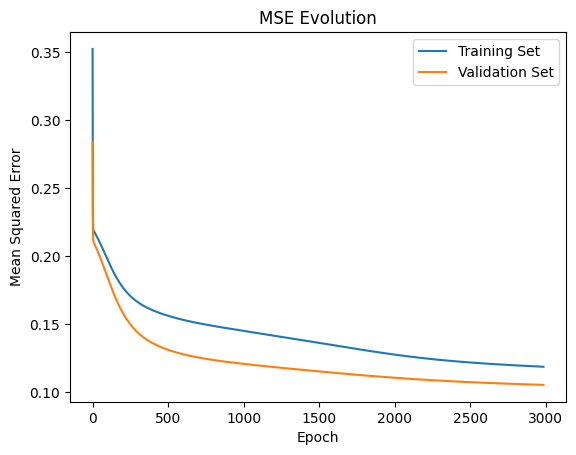

In [ ]:
plt.plot(range(len(mse_train)), mse_train, label='Training Set')
plt.plot(range(len(mse_val)), mse_val, label='Validation Set')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Evolution')
plt.legend()
plt.show()

## **CÁLCULO DA ACURÁCIA DO MODELO**

In [ ]:
accuracy = net.calculate_accuracy(X_test, y_test)
print(f"Accuracy on test set: {accuracy}")

Accuracy on test set: 0.8622754491017964
